In [1]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests
import tqdm
from time import sleep
import time
from PIL import Image
from io import BytesIO
from adjustText import adjust_text
from scipy.interpolate import interp1d
from nba_api.stats.static.players import find_players_by_full_name
from nba_api.stats.static.teams import find_teams_by_full_name, get_teams, find_team_name_by_id
from nba_api.stats.endpoints.playbyplayv2 import PlayByPlayV2
from nba_api.stats.endpoints.leaguegamefinder import LeagueGameFinder
from nba_api.stats.endpoints.shotchartdetail import ShotChartDetail


In [75]:
from scipy.stats import pearsonr, spearmanr, kendalltau

from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.patches import Rectangle
from matplotlib.ticker import FormatStrFormatter


import matplotlib.ticker as mtick

In [2]:
from nba_api.stats.endpoints.synergyplaytypes import SynergyPlayTypes
from nba_api.stats.endpoints.leaguedashptstats import LeagueDashPtStats


In [3]:
from nba_api.stats.endpoints.playergamelogs import PlayerGameLogs

In [107]:
game_logs = PlayerGameLogs(season_nullable='2021-22', measure_type_player_game_logs_nullable='Advanced', timeout=400).get_data_frames()[0]

In [108]:
game_logs = game_logs.loc[game_logs.MIN > 20]

In [109]:
game_logs.USG_PCT = game_logs.USG_PCT * 100

In [110]:
game_logs.TS_PCT = game_logs.TS_PCT * 100

In [111]:
player_ids = game_logs.PLAYER_ID.unique().tolist()

In [112]:
corrs = []
for player_id in player_ids:
    player_data = game_logs.loc[game_logs.PLAYER_ID == player_id]
    if len(player_data) < 20:
        continue
    cur_dict = {}
    cur_dict['PLAYER_NAME'] = player_data.iloc[0].PLAYER_NAME
    cur_dict['CORRELATION'] = pearsonr(player_data.USG_PCT, player_data.TS_PCT)[0]
    corrs.append(cur_dict)

In [113]:
df = pd.DataFrame(corrs)

In [106]:
df.loc[df.PLAYER_NAME == 'Dennis Schroder']

,PLAYER_NAME,CORRELATION
28,Dennis Schroder,0.23017


In [114]:
df.sort_values(by='CORRELATION', ascending=False)

,PLAYER_NAME,CORRELATION
139,Dennis Schroder,0.593904
17,Alex Caruso,0.569605
40,Derrick White,0.525273
1,Saddiq Bey,0.482359
92,Ricky Rubio,0.473692
150,Jerami Grant,0.470969
77,Spencer Dinwiddie,0.442303
58,Jae'Sean Tate,0.440484
39,Jakob Poeltl,0.439059
59,Christian Wood,0.430352


In [115]:
plt.style.use('fivethirtyeight')

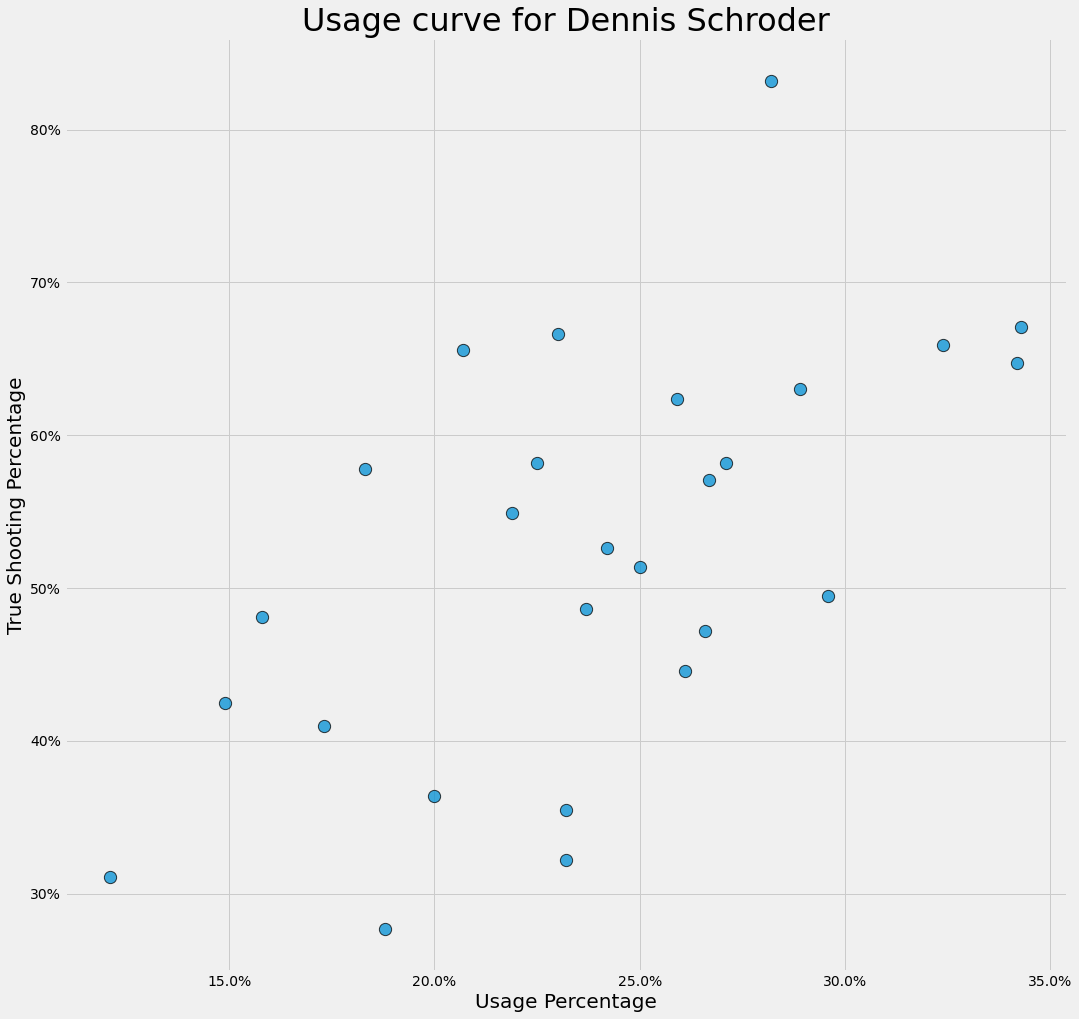

In [78]:
player_name = 'Dennis Schroder'
player_data = game_logs.loc[game_logs.PLAYER_NAME == player_name]

fig, ax = plt.subplots(figsize=(16, 16))
ax.scatter(player_data.USG_PCT, player_data.TS_PCT, s=150, alpha=0.75, lw=1, edgecolors='black')
ax.set_xlabel("Usage Percentage", size=20)
ax.set_ylabel("True Shooting Percentage", size=20)
ax.set_title(f"Usage curve for {player_name}", size=32)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.xaxis.set_major_formatter(mtick.PercentFormatter())

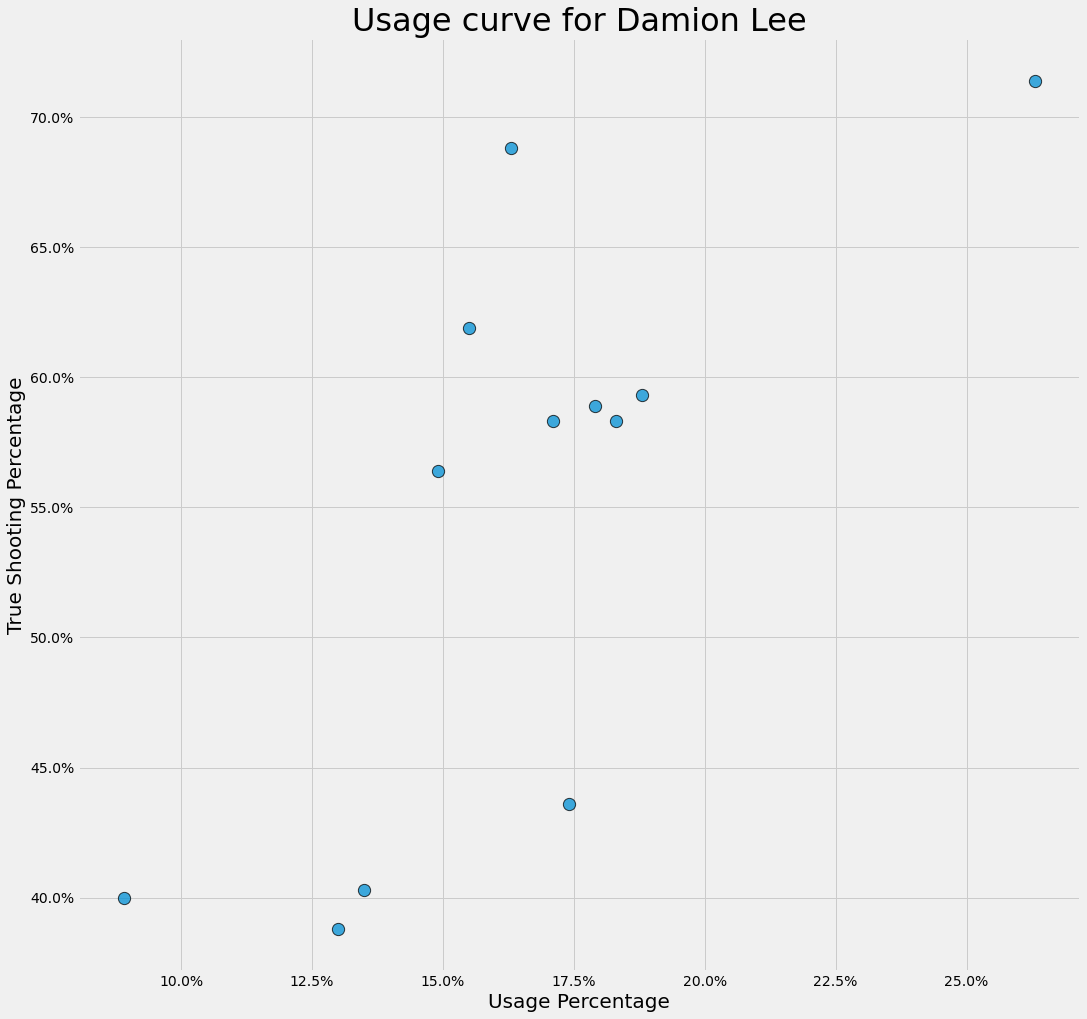

In [117]:
player_name = 'Damion Lee'
player_data = game_logs.loc[game_logs.PLAYER_NAME == player_name]

fig, ax = plt.subplots(figsize=(16, 16))
ax.scatter(player_data.USG_PCT, player_data.TS_PCT, s=150, alpha=0.75, lw=1, edgecolors='black')
ax.set_xlabel("Usage Percentage", size=20)
ax.set_ylabel("True Shooting Percentage", size=20)
ax.set_title(f"Usage curve for {player_name}", size=32)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.xaxis.set_major_formatter(mtick.PercentFormatter())

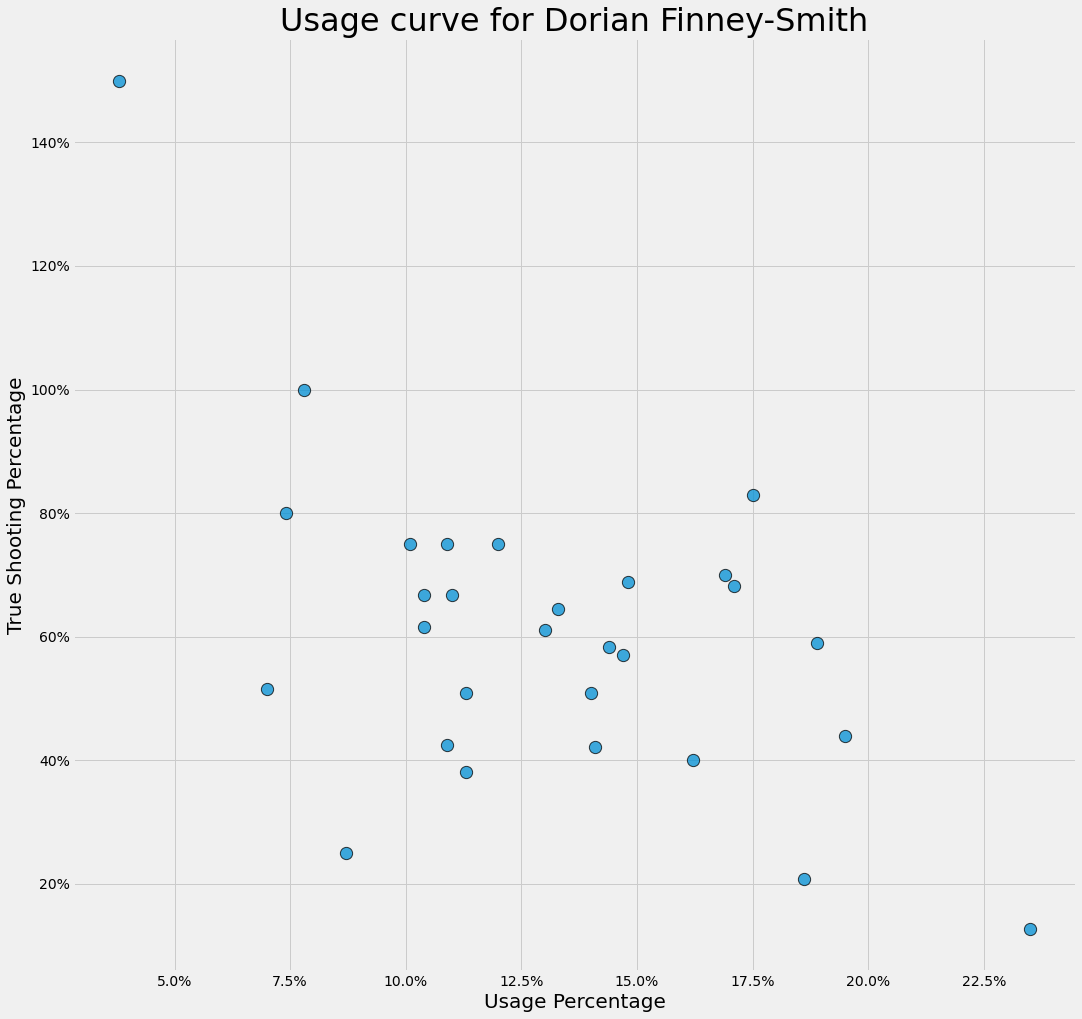

In [84]:
player_name = 'Dorian Finney-Smith'
player_data = game_logs.loc[game_logs.PLAYER_NAME == player_name]

fig, ax = plt.subplots(figsize=(16, 16))
ax.scatter(player_data.USG_PCT, player_data.TS_PCT, s=150, alpha=0.75, lw=1, edgecolors='black')
ax.set_xlabel("Usage Percentage", size=20)
ax.set_ylabel("True Shooting Percentage", size=20)
ax.set_title(f"Usage curve for {player_name}", size=32)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.xaxis.set_major_formatter(mtick.PercentFormatter())

In [67]:
df.sort_values(by='CORRELATION', ascending=True)

,PLAYER_NAME,CORRELATION
27,Dorian Finney-Smith,-0.545730
42,Keldon Johnson,-0.428120
88,Robert Williams III,-0.359464
26,Jaden McDaniels,-0.337873
28,Jarred Vanderbilt,-0.337252
116,Jonas Valanciunas,-0.305937
75,Darius Garland,-0.289110
4,Robert Covington,-0.276941
58,Terance Mann,-0.275437
127,Bobby Portis,-0.268202


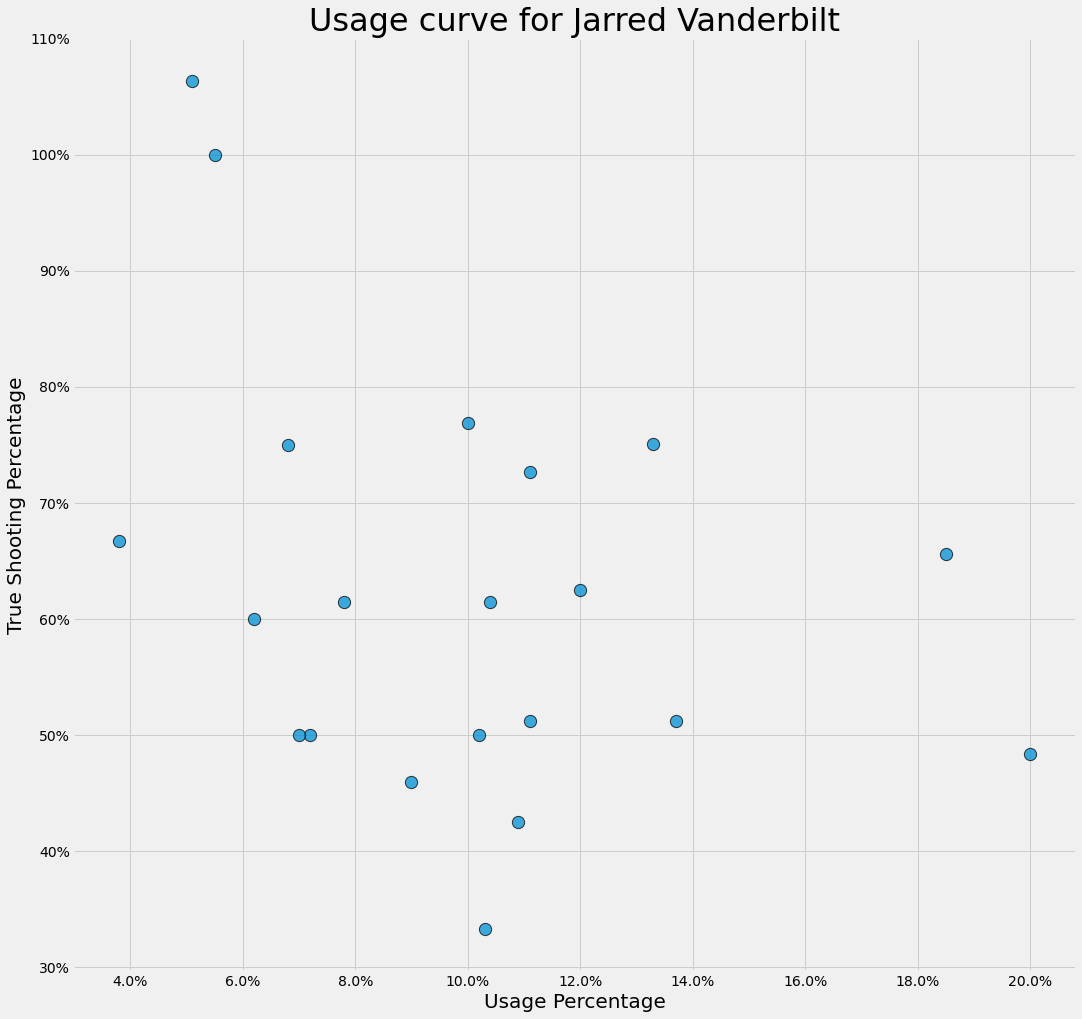

In [95]:
player_name = 'Jarred Vanderbilt'
player_data = game_logs.loc[game_logs.PLAYER_NAME == player_name]

fig, ax = plt.subplots(figsize=(16, 16))
ax.scatter(player_data.USG_PCT, player_data.TS_PCT, s=150, alpha=0.75, lw=1, edgecolors='black')
ax.set_xlabel("Usage Percentage", size=20)
ax.set_ylabel("True Shooting Percentage", size=20)
ax.set_title(f"Usage curve for {player_name}", size=32)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.xaxis.set_major_formatter(mtick.PercentFormatter())